In [1]:
import scanpy as sc
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import seaborn as sns

In [2]:
mpl.rcParams["figure.figsize"] = (12, 8)

In [3]:
ds = sc.read_h5ad("../data/02preprint/01obj-noribo.h5ad")

In [4]:
ds.shape

(48596, 20128)

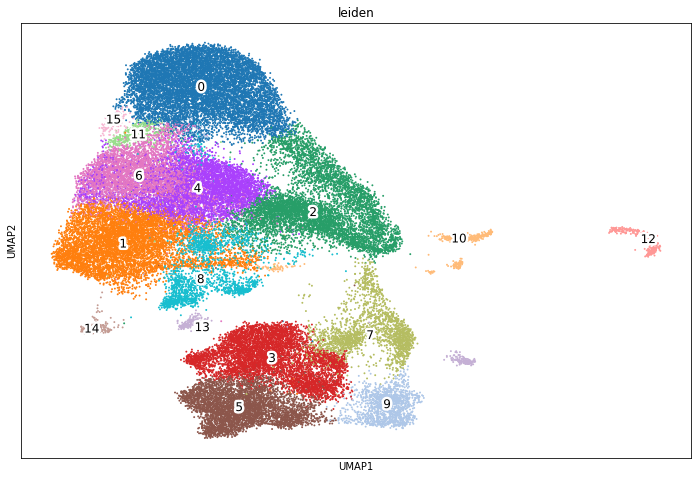

In [8]:
ax = sc.pl.umap(
    ds, 
    color="leiden", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

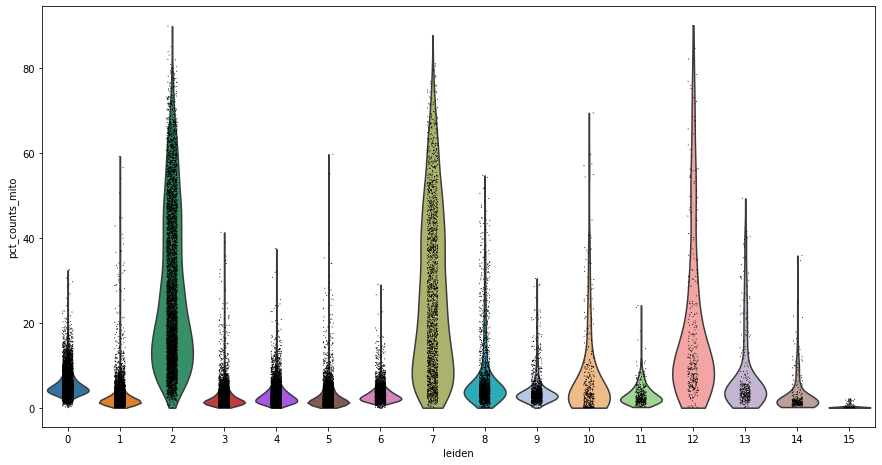

In [6]:
sc.pl.violin(ds, "pct_counts_mito", groupby="leiden")

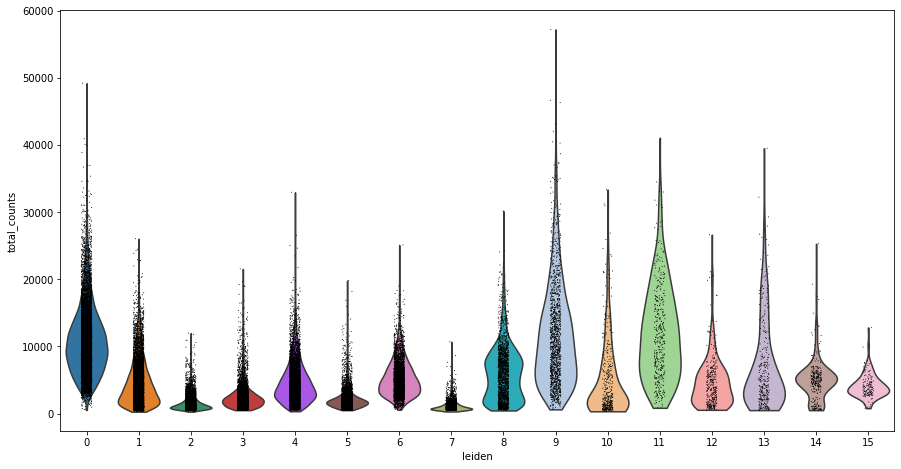

In [11]:
sc.pl.violin(ds, "total_counts", groupby="leiden")

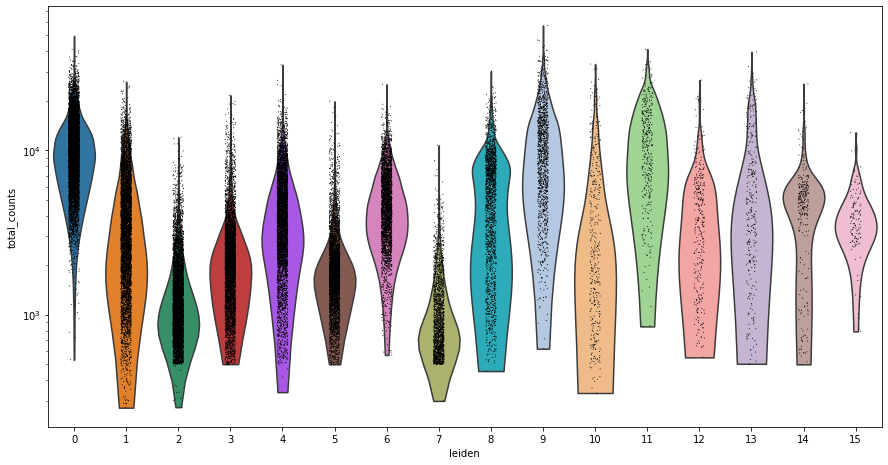

In [12]:
sc.pl.violin(ds, "total_counts", groupby="leiden", log=True)

In [9]:
markers = pd.read_csv("../data/02preprint/01obj-noribo-data/00markers.csv", index_col=0)
markers

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
0,0.000000,5.197956,0.999471,0.458470,0.000000,0,LYZ
1,0.000000,5.243514,0.999576,0.348028,0.000000,0,APOC1
2,0.000000,4.729768,0.986658,0.245658,0.000000,0,FBP1
3,0.000000,3.447265,0.998518,0.556498,0.000000,0,GRN
4,0.000000,3.026374,0.998094,0.638460,0.000000,0,TSPO
...,...,...,...,...,...,...,...
302396,0.047179,0.528490,0.683824,0.575526,0.047179,15,ATP5PD
302397,0.047607,0.507127,0.875000,0.758584,0.047607,15,ARHGDIB
302398,0.047998,0.537100,0.757353,0.618923,0.047998,15,COX5A
302399,0.048330,0.637371,0.919118,0.750949,0.048330,15,TXNIP


In [14]:
markers.loc[markers.cluster.isin(["2", "7"]), :].groupby("cluster").head(20)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
40256,0.000000e+00,2.754954,0.999189,0.979944,0.000000e+00,2,MT-CO2
40257,0.000000e+00,2.720285,0.999351,0.982725,0.000000e+00,2,MT-CO1
40258,0.000000e+00,2.863484,0.987024,0.905564,0.000000e+00,2,MT-ND5
40259,0.000000e+00,2.820496,0.981022,0.868422,0.000000e+00,2,MT-ND2
40260,0.000000e+00,2.757676,0.986050,0.903915,0.000000e+00,2,MT-ND1
40261,0.000000e+00,2.640973,0.991890,0.934647,0.000000e+00,2,MT-ATP6
40262,0.000000e+00,3.050981,0.988321,0.917749,0.000000e+00,2,MT-CYB
40263,0.000000e+00,3.372154,0.973560,0.849591,0.000000e+00,2,MT-ND4L
40264,0.000000e+00,2.539694,0.982482,0.885980,0.000000e+00,2,MT-ND4
40265,0.000000e+00,2.931080,0.989457,0.924748,0.000000e+00,2,MT-CO3


In [15]:
pd.Series(ds.obs_names[ds.obs.leiden.isin(("2", "7"))]).to_csv("01filter-out.csv")

/projects/b1038/Pulmonary/nmarkov/script/2020_Grant/First_Submission/single_cell_analysis/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
